Community Detection:

2. Community detection in networks.
 - synthetic data: random graphs, with random interconnecting edges + karate-klub, jazz/cora (as used here : https://github.com/esclear/louvain-leiden/tree/main/datasets)
 - get louvain and leiden codes to work from here (https://github.com/esclear/louvain-leiden/tree/main/)
 - compare algorithm with louvain, leiden and label propagation wrt accuracy score, ratio of within cluster edges / inter cluster edges and modularity -> Table 3.
 - For our algorithm, try (i) start with everyone alone, (ii) start with random clustering, (iii) start with the output of Leiden. -> Table 4


In [1]:
"""Load/import helper functions"""

import time
import random
from LocalPopular import locally_popular_clustering, extract_labels_from_communities

from GraphFunctions import generate_agents, calculate_euclidian_relationships, create_graph, \
    my_make_circles, create_graphs_euclid, create_graphs_kNN, \
    generate_graph,create_graphs_hop_distance, create_graphs_hop_distance_abs

from PlotHelperFunctions import plot_clustering, plot_stuff

from sklearn.cluster import KMeans, DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import rand_score
import numpy as np
import networkx as nx
from scipy.spatial import distance

from community_detection.leiden import leiden
from community_detection.louvain import louvain
from community_detection.quality_functions import CPM, Modularity


import data.jazz as jazz
import data.cora as cora

In [2]:
def draw_graph(G, pos=None, communities=None, labels=None, force_color={}, file=None):
    if communities:
        # Create a color map
        node_color = [0 for _ in G]

        for i, community in enumerate(communities):
            for node in community:
                node_color[node] = i

        for k, v in force_color.items():
            node_color[k] = v

        nx.draw(G, pos, node_color=node_color, cmap=plt.cm.rainbow, labels=labels)
    else:
        nx.draw(G, pos, labels=labels)

    if file:
        plt.savefig(file, bbox_inches='tight')

    plt.show()

### synthetic data:

In [3]:
n = 10
k = 25

G_orig,truth = generate_graph(n,k,0.2,0.05)



G = G_orig.copy()
initial_clustering = {i : i for i in range(n*k)}
agents = G.nodes()


f_bound = 0.5
e_bound = 0.5
G_F,G_E = create_graphs_hop_distance(G,f_bound,e_bound)
lp_a_b = locally_popular_clustering(agents, G_F, G_E, initial_clustering,mode='B')
lp_a_f = locally_popular_clustering(agents, G_F, G_E, initial_clustering,mode='F')
lp_a_e = locally_popular_clustering(agents, G_F, G_E, initial_clustering,mode='E')
print('Testing f_bound:', f_bound, ', e_bound:',e_bound)
print('Rand index (Balanced):',rand_score(truth,list(lp_a_b.values())))
print('Rand index (Friend-Oriented):',rand_score(truth,list(lp_a_f.values())))
print('Rand index (Enemy-Averse):',rand_score(truth,list(lp_a_e.values())))


G = G_orig.copy()
initial_clustering = {i : i for i in range(n*k)}
agents = G.nodes()
f_bound = 0.33
e_bound = 0.66
G_F,G_E = create_graphs_hop_distance(G,f_bound,e_bound)
lp_a_b = locally_popular_clustering(agents, G_F, G_E, initial_clustering,mode='B')
lp_a_f = locally_popular_clustering(agents, G_F, G_E, initial_clustering,mode='F')
lp_a_e = locally_popular_clustering(agents, G_F, G_E, initial_clustering,mode='E')
print('Testing f_bound:', f_bound, ', e_bound:',e_bound)
print('Rand index (Balanced):',rand_score(truth,list(lp_a_b.values())))
print('Rand index (Friend-Oriented):',rand_score(truth,list(lp_a_f.values())))
print('Rand index (Enemy-Averse):',rand_score(truth,list(lp_a_e.values())))


G = G_orig.copy()
initial_clustering = {i : i for i in range(n*k)}
agents = G.nodes()
f_bound = 0.2
e_bound = 0.2
G_F,G_E = create_graphs_hop_distance(G,f_bound,e_bound)
lp_a_b = locally_popular_clustering(agents, G_F, G_E, initial_clustering,mode='B')
lp_a_f = locally_popular_clustering(agents, G_F, G_E, initial_clustering,mode='F')
lp_a_e = locally_popular_clustering(agents, G_F, G_E, initial_clustering,mode='E')
print('Testing f_bound:', f_bound, ', e_bound:',e_bound)
print('Rand index (Balanced):',rand_score(truth,list(lp_a_b.values())))
print('Rand index (Friend-Oriented):',rand_score(truth,list(lp_a_f.values())))
print('Rand index (Enemy-Averse):',rand_score(truth,list(lp_a_e.values())))


G = G_orig.copy()
initial_clustering = {i : i for i in range(n*k)}
agents = G.nodes()
f_bound = 0.3
e_bound = 0.3
G_F,G_E = create_graphs_hop_distance(G,f_bound,e_bound)
lp_a_b = locally_popular_clustering(agents, G_F, G_E, initial_clustering,mode='B')
lp_a_f = locally_popular_clustering(agents, G_F, G_E, initial_clustering,mode='F')
lp_a_e = locally_popular_clustering(agents, G_F, G_E, initial_clustering,mode='E')
print('Testing f_bound:', f_bound, ', e_bound:',e_bound)
print('Rand index (Balanced):',rand_score(truth,list(lp_a_b.values())))
print('Rand index (Friend-Oriented):',rand_score(truth,list(lp_a_f.values())))
print('Rand index (Enemy-Averse):',rand_score(truth,list(lp_a_e.values())))


G = G_orig.copy()
initial_clustering = {i : i for i in range(n*k)}
agents = G.nodes()
f_bound = 0.4
e_bound = 0.4
G_F,G_E = create_graphs_hop_distance(G,f_bound,e_bound)
lp_a_b = locally_popular_clustering(agents, G_F, G_E, initial_clustering,mode='B')
lp_a_f = locally_popular_clustering(agents, G_F, G_E, initial_clustering,mode='F')
lp_a_e = locally_popular_clustering(agents, G_F, G_E, initial_clustering,mode='E')
print('Testing f_bound:', f_bound, ', e_bound:',e_bound)
print('Rand index (Balanced):',rand_score(truth,list(lp_a_b.values())))
print('Rand index (Friend-Oriented):',rand_score(truth,list(lp_a_f.values())))
print('Rand index (Enemy-Averse):',rand_score(truth,list(lp_a_e.values())))

G = G_orig.copy()
initial_clustering = {i : i for i in range(n*k)}
agents = G.nodes()
f_bound = 0.5
e_bound = 0.5
G_F,G_E = create_graphs_hop_distance(G,f_bound,e_bound)
lp_a_b = locally_popular_clustering(agents, G_F, G_E, initial_clustering,mode='B')
lp_a_f = locally_popular_clustering(agents, G_F, G_E, initial_clustering,mode='F')
lp_a_e = locally_popular_clustering(agents, G_F, G_E, initial_clustering,mode='E')
print('Testing f_bound:', f_bound, ', e_bound:',e_bound)
print('Rand index (Balanced):',rand_score(truth,list(lp_a_b.values())))
print('Rand index (Friend-Oriented):',rand_score(truth,list(lp_a_f.values())))
print('Rand index (Enemy-Averse):',rand_score(truth,list(lp_a_e.values())))


249
246
243
Testing f_bound: 0.5 , e_bound: 0.5
Rand index (Balanced): 0.37751004016064255
Rand index (Friend-Oriented): 0.3707951807228916
Rand index (Enemy-Averse): 0.36738955823293173
229
249
225
Testing f_bound: 0.33 , e_bound: 0.66
Rand index (Balanced): 0.9331726907630522
Rand index (Friend-Oriented): 0.9331084337349398
Rand index (Enemy-Averse): 0.9376706827309237
162
195
159
Testing f_bound: 0.2 , e_bound: 0.2
Rand index (Balanced): 0.9595180722891566
Rand index (Friend-Oriented): 0.9580722891566265
Rand index (Enemy-Averse): 0.9603855421686747
162
195
159
Testing f_bound: 0.3 , e_bound: 0.3
Rand index (Balanced): 0.9595180722891566
Rand index (Friend-Oriented): 0.9580722891566265
Rand index (Enemy-Averse): 0.9603855421686747
162
195
159
Testing f_bound: 0.4 , e_bound: 0.4
Rand index (Balanced): 0.9595180722891566
Rand index (Friend-Oriented): 0.9580722891566265
Rand index (Enemy-Averse): 0.9603855421686747
249
246
243
Testing f_bound: 0.5 , e_bound: 0.5
Rand index (Balanced): 

In [4]:

f_bound = 2
e_bound = 3


n = 2
k = 4
G,truth = generate_graph(n,k,0.2,0.05)
initial_clustering = {i : i for i in range(n*k)}
agents = G.nodes()
G_F,G_E = create_graphs_hop_distance_abs(G,f_bound,e_bound)
lp_a_b = locally_popular_clustering(agents, G_F, G_E, initial_clustering,mode='B')
lp_a_f = locally_popular_clustering(agents, G_F, G_E, initial_clustering,mode='F')
lp_a_e = locally_popular_clustering(agents, G_F, G_E, initial_clustering,mode='E')
print('Testing n:', n, ', k:',k)
print('Rand index (Balanced):',rand_score(truth,list(lp_a_b.values())))
print('Rand index (Friend-Oriented):',rand_score(truth,list(lp_a_f.values())))
print('Rand index (Enemy-Averse):',rand_score(truth,list(lp_a_e.values())))


n = 5
k = 4
G,truth = generate_graph(n,k,0.2,0.05)
initial_clustering = {i : i for i in range(n*k)}
agents = G.nodes()
G_F,G_E = create_graphs_hop_distance_abs(G,f_bound,e_bound)
lp_a_b = locally_popular_clustering(agents, G_F, G_E, initial_clustering,mode='B')
lp_a_f = locally_popular_clustering(agents, G_F, G_E, initial_clustering,mode='F')
lp_a_e = locally_popular_clustering(agents, G_F, G_E, initial_clustering,mode='E')
print('Testing n:', n, ', k:',k)
print('Rand index (Balanced):',rand_score(truth,list(lp_a_b.values())))
print('Rand index (Friend-Oriented):',rand_score(truth,list(lp_a_f.values())))
print('Rand index (Enemy-Averse):',rand_score(truth,list(lp_a_e.values())))


n = 5
k = 8
G,truth = generate_graph(n,k,0.2,0.05)
initial_clustering = {i : i for i in range(n*k)}
agents = G.nodes()
G_F,G_E = create_graphs_hop_distance_abs(G,f_bound,e_bound)
lp_a_b = locally_popular_clustering(agents, G_F, G_E, initial_clustering,mode='B')
lp_a_f = locally_popular_clustering(agents, G_F, G_E, initial_clustering,mode='F')
lp_a_e = locally_popular_clustering(agents, G_F, G_E, initial_clustering,mode='E')
print('Testing n:', n, ', k:',k)
print('Rand index (Balanced):',rand_score(truth,list(lp_a_b.values())))
print('Rand index (Friend-Oriented):',rand_score(truth,list(lp_a_f.values())))
print('Rand index (Enemy-Averse):',rand_score(truth,list(lp_a_e.values())))


n = 8
k = 10
G,truth = generate_graph(n,k,0.2,0.05)
initial_clustering = {i : i for i in range(n*k)}
agents = G.nodes()
G_F,G_E = create_graphs_hop_distance_abs(G,f_bound,e_bound)
lp_a_b = locally_popular_clustering(agents, G_F, G_E, initial_clustering,mode='B')
lp_a_f = locally_popular_clustering(agents, G_F, G_E, initial_clustering,mode='F')
lp_a_e = locally_popular_clustering(agents, G_F, G_E, initial_clustering,mode='E')
print('Testing n:', n, ', k:',k)
print('Rand index (Balanced):',rand_score(truth,list(lp_a_b.values())))
print('Rand index (Friend-Oriented):',rand_score(truth,list(lp_a_f.values())))
print('Rand index (Enemy-Averse):',rand_score(truth,list(lp_a_e.values())))


n = 10
k = 10
G,truth = generate_graph(n,k,0.2,0.05)
initial_clustering = {i : i for i in range(n*k)}
agents = G.nodes()
G_F,G_E = create_graphs_hop_distance_abs(G,f_bound,e_bound)
lp_a_b = locally_popular_clustering(agents, G_F, G_E, initial_clustering,mode='B')
lp_a_f = locally_popular_clustering(agents, G_F, G_E, initial_clustering,mode='F')
lp_a_e = locally_popular_clustering(agents, G_F, G_E, initial_clustering,mode='E')
print('Testing n:', n, ', k:',k)
print('Rand index (Balanced):',rand_score(truth,list(lp_a_b.values())))
print('Rand index (Friend-Oriented):',rand_score(truth,list(lp_a_f.values())))
print('Rand index (Enemy-Averse):',rand_score(truth,list(lp_a_e.values())))

n = 10
k = 20
G,truth = generate_graph(n,k,0.2,0.05)
initial_clustering = {i : i for i in range(n*k)}
agents = G.nodes()
G_F,G_E = create_graphs_hop_distance_abs(G,f_bound,e_bound)
lp_a_b = locally_popular_clustering(agents, G_F, G_E, initial_clustering,mode='B')
lp_a_f = locally_popular_clustering(agents, G_F, G_E, initial_clustering,mode='F')
lp_a_e = locally_popular_clustering(agents, G_F, G_E, initial_clustering,mode='E')
print('Testing n:', n, ', k:',k)
print('Rand index (Balanced):',rand_score(truth,list(lp_a_b.values())))
print('Rand index (Friend-Oriented):',rand_score(truth,list(lp_a_f.values())))
print('Rand index (Enemy-Averse):',rand_score(truth,list(lp_a_e.values())))

n = 10
k = 25
G,truth = generate_graph(n,k,0.2,0.05)
initial_clustering = {i : i for i in range(n*k)}
agents = G.nodes()
G_F,G_E = create_graphs_hop_distance_abs(G,f_bound,e_bound)
lp_a_b = locally_popular_clustering(agents, G_F, G_E, initial_clustering,mode='B')
lp_a_f = locally_popular_clustering(agents, G_F, G_E, initial_clustering,mode='F')
lp_a_e = locally_popular_clustering(agents, G_F, G_E, initial_clustering,mode='E')
print('Testing n:', n, ', k:',k)
print('Rand index (Balanced):',rand_score(truth,list(lp_a_b.values())))
print('Rand index (Friend-Oriented):',rand_score(truth,list(lp_a_f.values())))
print('Rand index (Enemy-Averse):',rand_score(truth,list(lp_a_e.values())))

7
7
7
Testing n: 2 , k: 4
Rand index (Balanced): 0.14285714285714285
Rand index (Friend-Oriented): 0.14285714285714285
Rand index (Enemy-Averse): 0.14285714285714285
16
16
15
Testing n: 5 , k: 4
Rand index (Balanced): 0.7315789473684211
Rand index (Friend-Oriented): 0.7315789473684211
Rand index (Enemy-Averse): 0.8052631578947368
29
31
27
Testing n: 5 , k: 8
Rand index (Balanced): 0.8423076923076923
Rand index (Friend-Oriented): 0.8346153846153846
Rand index (Enemy-Averse): 0.8705128205128205
76
78
85
Testing n: 8 , k: 10
Rand index (Balanced): 0.8189873417721519
Rand index (Friend-Oriented): 0.8079113924050633
Rand index (Enemy-Averse): 0.8462025316455696
118
120
124
Testing n: 10 , k: 10
Rand index (Balanced): 0.78
Rand index (Friend-Oriented): 0.7828282828282829
Rand index (Enemy-Averse): 0.817979797979798
208
203
194
Testing n: 10 , k: 20
Rand index (Balanced): 0.5609045226130653
Rand index (Friend-Oriented): 0.5366331658291458
Rand index (Enemy-Averse): 0.5649748743718593
244
243


In [19]:
n = 5
k = 4

G,truth = generate_graph(n,k,0.7,0.05)

initial_clustering = {i : i for i in range(n*k)}
agents = G.nodes()

G_F,G_E = create_graphs_hop_distance(G,0.2,0.3)


lp_a_b = locally_popular_clustering(agents, G_F, G_E, initial_clustering,mode='B')
lp_a_f = locally_popular_clustering(agents, G_F, G_E, initial_clustering,mode='F')
lp_a_e = locally_popular_clustering(agents, G_F, G_E, initial_clustering,mode='E')


13
13
13


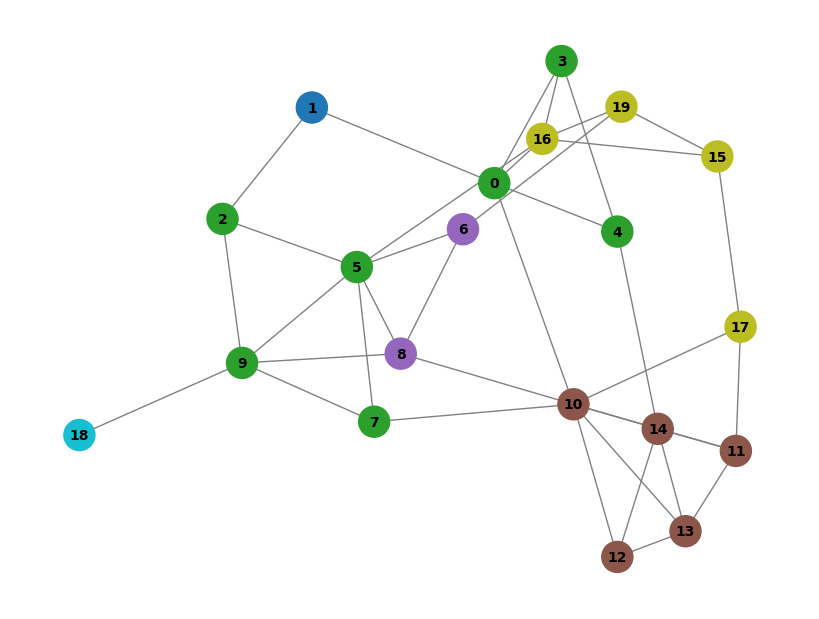

Rand index: 0.8789473684210526


In [20]:
import matplotlib.pyplot as plt
clustering = lp_a_b
unique_classes = clustering
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_classes)))  # Generate distinct colors
class_to_color = {cls: colors[i] for i, cls in enumerate(unique_classes)}
node_colors = [class_to_color[clustering[node]] for node in G.nodes()]

# Draw the graph
plt.figure(figsize=(8, 6))
nx.draw(G, pos=nx.spring_layout(G, seed=42), node_color=node_colors, with_labels=True, 
        edge_color='gray', node_size=500, font_size=10, font_weight='bold')
plt.show()
print('Rand index:',rand_score(truth,list(clustering.values())))

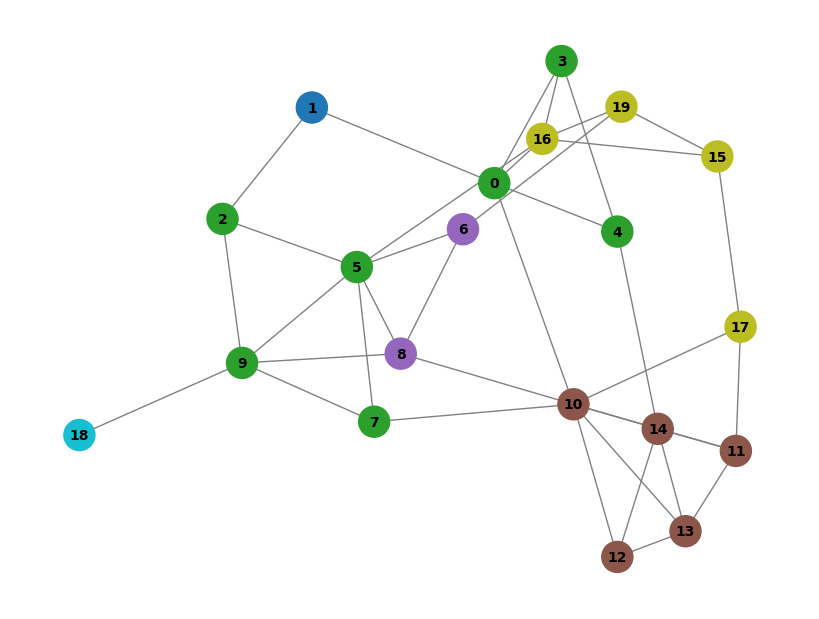

Rand index: 0.8789473684210526


In [21]:
import matplotlib.pyplot as plt
clustering = lp_a_f
unique_classes = clustering
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_classes)))  # Generate distinct colors
class_to_color = {cls: colors[i] for i, cls in enumerate(unique_classes)}
node_colors = [class_to_color[clustering[node]] for node in G.nodes()]

# Draw the graph
plt.figure(figsize=(8, 6))
nx.draw(G, pos=nx.spring_layout(G, seed=42), node_color=node_colors, with_labels=True, 
        edge_color='gray', node_size=500, font_size=10, font_weight='bold')
plt.show()
print('Rand index:',rand_score(truth,list(clustering.values())))

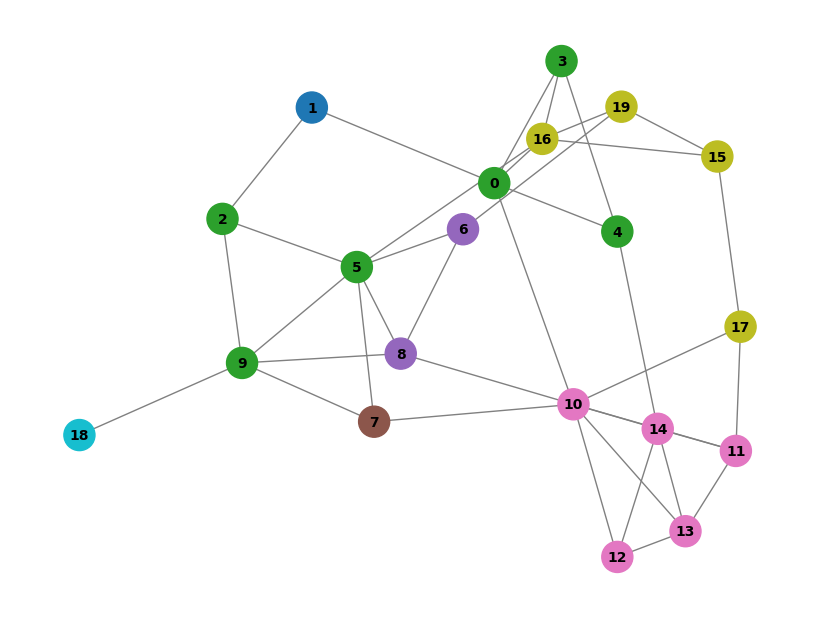

Rand index: 0.8736842105263158


In [22]:
import matplotlib.pyplot as plt
clustering = lp_a_e
unique_classes = clustering
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_classes)))  # Generate distinct colors
class_to_color = {cls: colors[i] for i, cls in enumerate(unique_classes)}
node_colors = [class_to_color[clustering[node]] for node in G.nodes()]

# Draw the graph
plt.figure(figsize=(8, 6))
nx.draw(G, pos=nx.spring_layout(G, seed=42), node_color=node_colors, with_labels=True, 
        edge_color='gray', node_size=500, font_size=10, font_weight='bold')
plt.show()
print('Rand index:',rand_score(truth,list(clustering.values())))

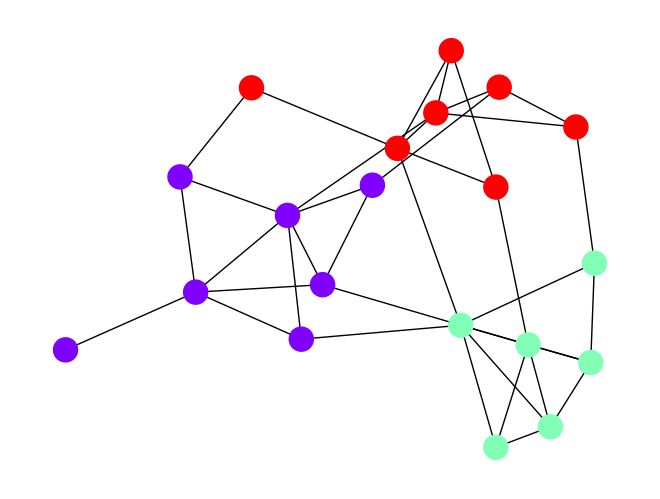

Rand index: 0.7842105263157895


In [23]:
H = Modularity(1)
P = louvain(G, H, weight="weight")
pos = nx.spring_layout(G, seed=42)



"""extracting labels"""
d = dict()
communities = P.communities
for i in range(len(communities)):
    c = communities[i]
    for node in c:
        d[node] = i

draw_graph(G, pos, P.communities, {})
print('Rand index:',rand_score(truth,list(d.values())))

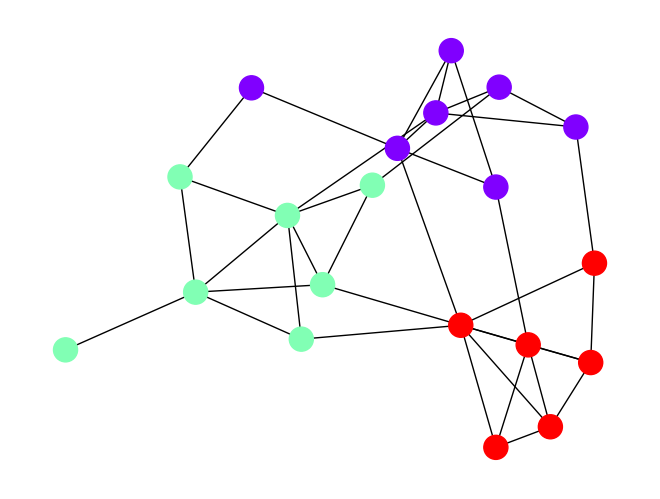

Rand index: 0.8052631578947368


In [24]:
# Calculate a new partition into communities, using Modularity and the Leiden algorithm …
Q = leiden(G, H, weight="weight")
# … and draw the result:
"""extracting labels"""
d = dict()
communities = Q.communities
for i in range(len(communities)):
    c = communities[i]
    for node in c:
        d[node] = i


draw_graph(G, pos, Q.communities, {})
print('Rand index:',rand_score(truth,list(d.values())))

Since the enemy-averse heuristic has the highest rand score we will continue using this flag.

In [11]:
n = 5
k = 10

G,truth = generate_graph(n,k,0.2,0.05)

initial_clustering = {i : i for i in range(n*k)}
initial_clustering_k = {i : random.randint(0, k) for i in range(n*k)}
agents = G.nodes()


f_bound = 0.2
e_bound = 0.2
G_F,G_E = create_graphs_hop_distance(G,f_bound,e_bound)
lp_a_e = locally_popular_clustering(agents, G_F, G_E, initial_clustering,mode='E')
lp_b_e = locally_popular_clustering(agents, G_F, G_E, initial_clustering_k,mode='E', max_coalitions=k)

H = Modularity(1)
P = louvain(G, H, weight="weight")
louvian_labels = extract_labels_from_communities(P.communities)

Q = leiden(G, H, weight="weight")
leiden_labels = extract_labels_from_communities(Q.communities)

lp_c_e = locally_popular_clustering(agents, G_F, G_E, leiden_labels,mode='E', max_coalitions=k)


print('Testing n =', n, ', k =',k)
print('Rand index Local Heuristic:',rand_score(truth,list(lp_a_e.values())))
print('Rand index Local Heuristic (k starting Coalitions):',rand_score(truth,list(lp_b_e.values())))
print('Rand index Louvain:',rand_score(truth,list(louvian_labels.values())))
print('Rand index Leiden:',rand_score(truth,list(leiden_labels.values())))
print('Rand index Local Heuristic (starting from Leiden output):',rand_score(truth,list(lp_c_e.values())))

n = 10
k = 10

G,truth = generate_graph(n,k,0.2,0.05)

initial_clustering = {i : i for i in range(n*k)}
initial_clustering_k = {i : random.randint(0, k) for i in range(n*k)}
agents = G.nodes()


f_bound = 0.2
e_bound = 0.2
G_F,G_E = create_graphs_hop_distance(G,f_bound,e_bound)
lp_a_e = locally_popular_clustering(agents, G_F, G_E, initial_clustering,mode='E')
lp_b_e = locally_popular_clustering(agents, G_F, G_E, initial_clustering_k,mode='E', max_coalitions=k)

H = Modularity(1)
P = louvain(G, H, weight="weight")
louvian_labels = extract_labels_from_communities(P.communities)

Q = leiden(G, H, weight="weight")
leiden_labels = extract_labels_from_communities(Q.communities)

lp_c_e = locally_popular_clustering(agents, G_F, G_E, leiden_labels,mode='E', max_coalitions=k)


print('Testing n =', n, ', k =',k)
print('Rand index Local Heuristic:',rand_score(truth,list(lp_a_e.values())))
print('Rand index Local Heuristic (k starting Coalitions):',rand_score(truth,list(lp_b_e.values())))
print('Rand index Louvain:',rand_score(truth,list(louvian_labels.values())))
print('Rand index Leiden:',rand_score(truth,list(leiden_labels.values())))
print('Rand index Local Heuristic (starting from Leiden output):',rand_score(truth,list(lp_c_e.values())))

n = 10
k = 25

G,truth = generate_graph(n,k,0.2,0.05)

initial_clustering = {i : i for i in range(n*k)}
initial_clustering_k = {i : random.randint(0, k) for i in range(n*k)}
agents = G.nodes()


f_bound = 0.2
e_bound = 0.2
G_F,G_E = create_graphs_hop_distance(G,f_bound,e_bound)
lp_a_e = locally_popular_clustering(agents, G_F, G_E, initial_clustering,mode='E')
lp_b_e = locally_popular_clustering(agents, G_F, G_E, initial_clustering_k,mode='E', max_coalitions=k)

H = Modularity(1)
P = louvain(G, H, weight="weight")
louvian_labels = extract_labels_from_communities(P.communities)

Q = leiden(G, H, weight="weight")
leiden_labels = extract_labels_from_communities(Q.communities)

lp_c_e = locally_popular_clustering(agents, G_F, G_E, leiden_labels,mode='E', max_coalitions=k)


print('Testing n =', n, ', k =',k)
print('Rand index Local Heuristic:',rand_score(truth,list(lp_a_e.values())))
print('Rand index Local Heuristic (k starting Coalitions):',rand_score(truth,list(lp_b_e.values())))
print('Rand index Louvain:',rand_score(truth,list(louvian_labels.values())))
print('Rand index Leiden:',rand_score(truth,list(leiden_labels.values())))
print('Rand index Local Heuristic (starting from Leiden output):',rand_score(truth,list(lp_c_e.values())))


22
25
13
Testing n = 5 , k = 10
Rand index Local Heuristic: 0.9142857142857143
Rand index Local Heuristic (k starting Coalitions): 0.8677551020408163
Rand index Louvain: 0.8783673469387755
Rand index Leiden: 0.9012244897959184
Rand index Local Heuristic (starting from Leiden output): 0.9093877551020408
52
61
37
Testing n = 10 , k = 10
Rand index Local Heuristic: 0.9078787878787878
Rand index Local Heuristic (k starting Coalitions): 0.8498989898989899
Rand index Louvain: 0.9092929292929293
Rand index Leiden: 0.8741414141414141
Rand index Local Heuristic (starting from Leiden output): 0.8834343434343435
151
201
179
Testing n = 10 , k = 25
Rand index Local Heuristic: 0.9616385542168675
Rand index Local Heuristic (k starting Coalitions): 0.9338473895582329
Rand index Louvain: 0.9270682730923695
Rand index Leiden: 0.8865542168674698
Rand index Local Heuristic (starting from Leiden output): 0.9400160642570281


# Karate-Club


In [12]:
G = nx.karate_club_graph()
truth = list(map(lambda x: G.nodes[x]["club"], range(34)))
initial_clustering = {i : i for i in range(34)}
initial_clustering_k = {i : random.randint(0, 1) for i in range(34)}
initial_clustering_t = {i: 0 for i in range(34)}

agents = G.nodes()

G_F,G_E = create_graphs_hop_distance(G,0.4,0.4)


test = locally_popular_clustering(agents, G_F, G_E, initial_clustering_t,mode='E', max_coalitions=2)
lp_a_e = locally_popular_clustering(agents, G_F, G_E, initial_clustering,mode='E')
lp_b_e = locally_popular_clustering(agents, G_F, G_E, initial_clustering_k,mode='E')

lp_a_b = locally_popular_clustering(agents, G_F, G_E, initial_clustering,mode='B')
lp_b_b = locally_popular_clustering(agents, G_F, G_E, initial_clustering_k,mode='B')

lp_a_f = locally_popular_clustering(agents, G_F, G_E, initial_clustering,mode='F')
lp_b_f = locally_popular_clustering(agents, G_F, G_E, initial_clustering_k,mode='F')

H = Modularity(1)
P = louvain(G, H, weight="weight")
louvian_labels = extract_labels_from_communities(P.communities)

Q = leiden(G, H, weight="weight")
leiden_labels = extract_labels_from_communities(Q.communities)

lp_c_e = locally_popular_clustering(agents, G_F, G_E, leiden_labels,mode='E', max_coalitions=2)
lp_c_b = locally_popular_clustering(agents, G_F, G_E, leiden_labels,mode='B', max_coalitions=2)
lp_c_f = locally_popular_clustering(agents, G_F, G_E, leiden_labels,mode='F', max_coalitions=2)

print('Rand index Test (E):',rand_score(truth,list(test.values())))

print('Rand index Local Heuristic (E):',rand_score(truth,list(lp_a_e.values())))

print('Rand index Local Heuristic (B):',rand_score(truth,list(lp_a_b.values())))

print('Rand index Local Heuristic (F):',rand_score(truth,list(lp_a_f.values())))

print('Rand index Local Heuristic (k starting Coalitions) (E):',rand_score(truth,list(lp_b_e.values())))
print('Rand index Local Heuristic (k starting Coalitions) (B):',rand_score(truth,list(lp_b_b.values())))
print('Rand index Local Heuristic (k starting Coalitions) (F):',rand_score(truth,list(lp_b_f.values())))
print('Rand index Louvain:',rand_score(truth,list(louvian_labels.values())))
print('Rand index Leiden:',rand_score(truth,list(leiden_labels.values())))
print('Rand index Local Heuristic (starting from Leiden output)(E):',rand_score(truth,list(lp_c_e.values())))
print('Rand index Local Heuristic (starting from Leiden output)(B):',rand_score(truth,list(lp_c_b.values())))
print('Rand index Local Heuristic (starting from Leiden output)(F):',rand_score(truth,list(lp_c_f.values())))



3
31
13
36
13
36
13
9
9
9
Rand index Test (E): 0.48663101604278075
Rand index Local Heuristic (E): 0.8645276292335116
Rand index Local Heuristic (B): 0.8645276292335116
Rand index Local Heuristic (F): 0.8645276292335116
Rand index Local Heuristic (k starting Coalitions) (E): 1.0
Rand index Local Heuristic (k starting Coalitions) (B): 1.0
Rand index Local Heuristic (k starting Coalitions) (F): 1.0
Rand index Louvain: 0.5935828877005348
Rand index Leiden: 0.6898395721925134
Rand index Local Heuristic (starting from Leiden output)(E): 0.6862745098039216
Rand index Local Heuristic (starting from Leiden output)(B): 0.6862745098039216
Rand index Local Heuristic (starting from Leiden output)(F): 0.6862745098039216


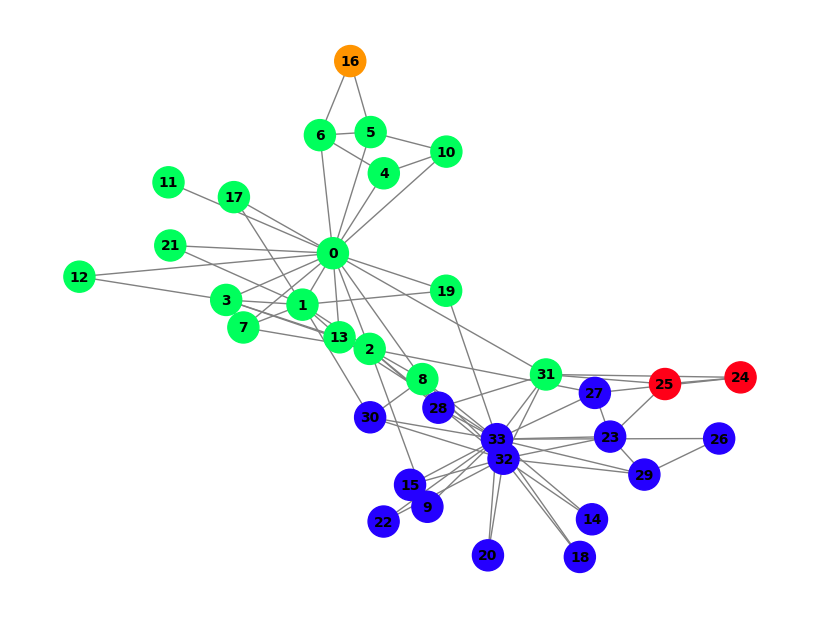

{0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 14, 10: 1, 11: 1, 12: 1, 13: 1, 14: 14, 15: 14, 16: 16, 17: 1, 18: 14, 19: 1, 20: 14, 21: 1, 22: 14, 23: 14, 24: 25, 25: 25, 26: 14, 27: 14, 28: 14, 29: 14, 30: 14, 31: 1, 32: 14, 33: 14}
Rand index: 0.8645276292335116


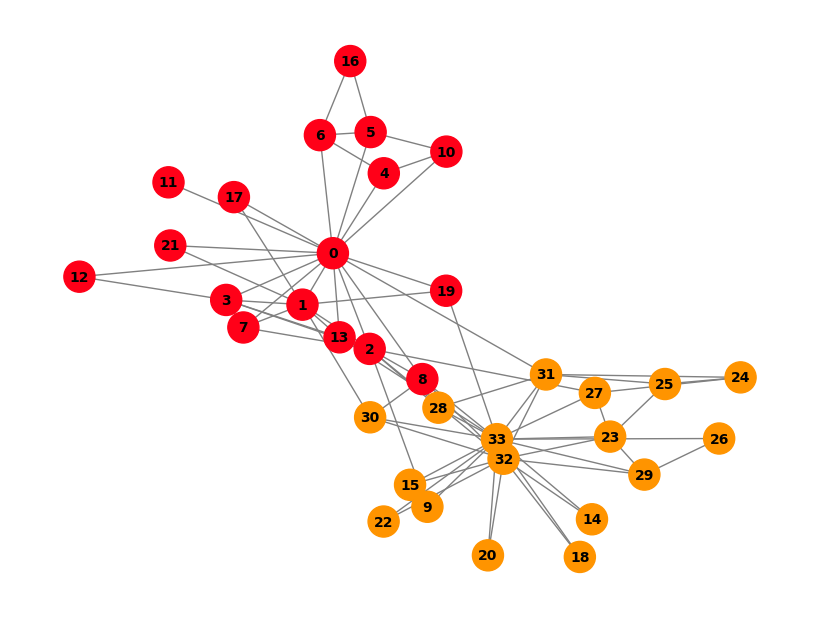

{0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 0, 10: 1, 11: 1, 12: 1, 13: 1, 14: 0, 15: 0, 16: 1, 17: 1, 18: 0, 19: 1, 20: 0, 21: 1, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 0}
Rand index: 1.0


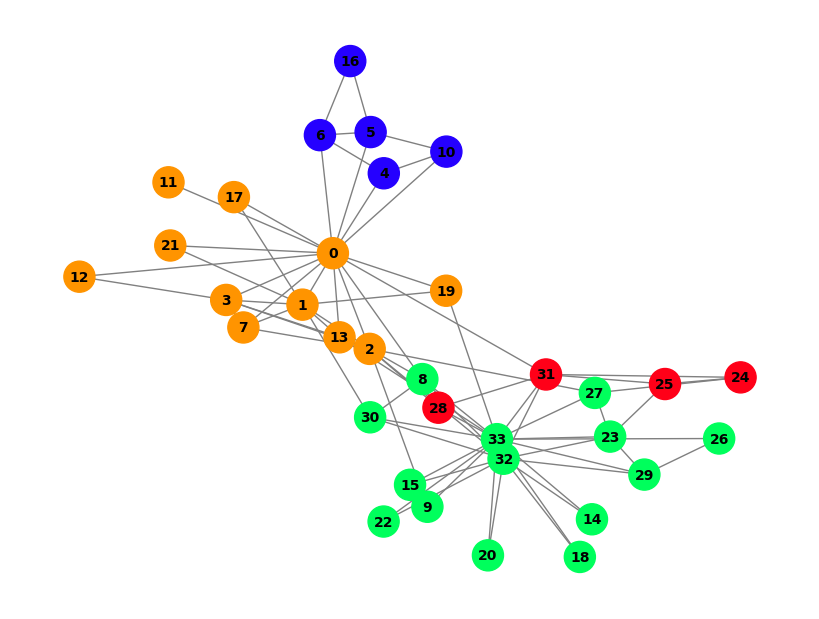

{0: 0, 1: 0, 2: 0, 3: 0, 7: 0, 11: 0, 12: 0, 13: 0, 17: 0, 19: 0, 21: 0, 32: 1, 33: 1, 8: 1, 9: 1, 14: 1, 15: 1, 18: 1, 20: 1, 22: 1, 23: 1, 26: 1, 27: 1, 29: 1, 30: 1, 4: 2, 5: 2, 6: 2, 10: 2, 16: 2, 24: 3, 25: 3, 28: 3, 31: 3}
Rand index: 0.5935828877005348


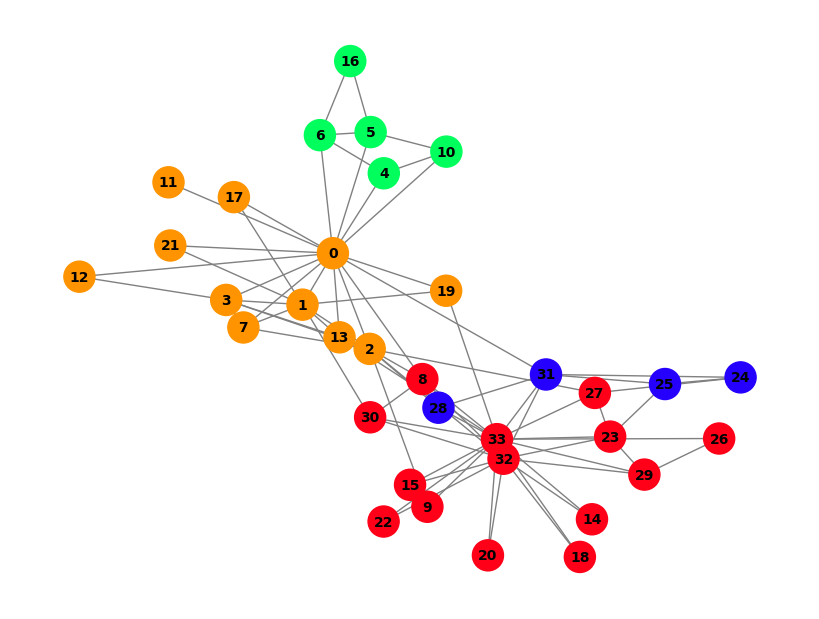

{0: 0, 1: 0, 2: 0, 3: 0, 7: 0, 11: 0, 12: 0, 13: 0, 17: 0, 19: 0, 21: 0, 4: 1, 5: 1, 6: 1, 10: 1, 16: 1, 24: 2, 25: 2, 28: 2, 31: 2, 32: 3, 33: 3, 8: 3, 9: 3, 14: 3, 15: 3, 18: 3, 20: 3, 22: 3, 23: 3, 26: 3, 27: 3, 29: 3, 30: 3}
Rand index: 0.6898395721925134


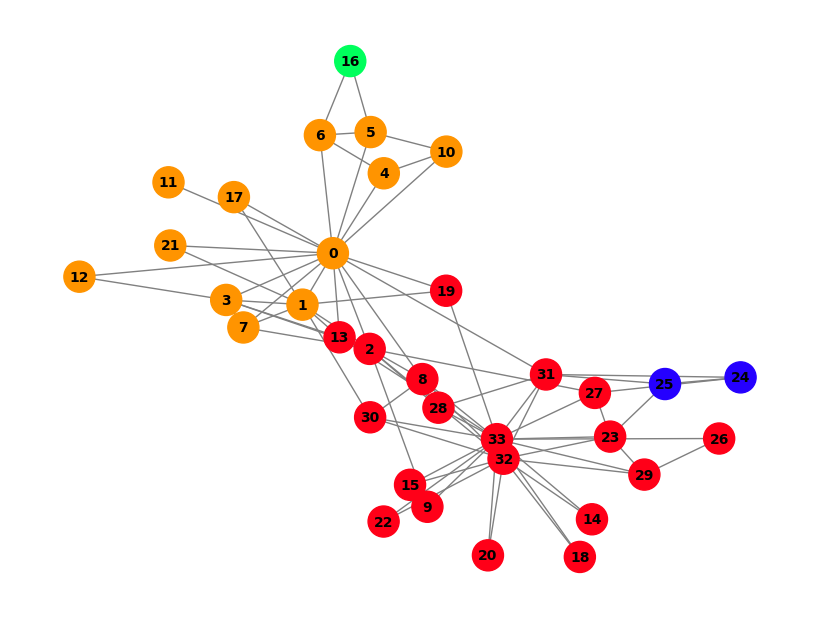

{0: 0, 1: 0, 2: 3, 3: 0, 7: 0, 11: 0, 12: 0, 13: 3, 17: 0, 19: 3, 21: 0, 4: 0, 5: 0, 6: 0, 10: 0, 16: 1, 24: 2, 25: 2, 28: 3, 31: 3, 32: 3, 33: 3, 8: 3, 9: 3, 14: 3, 15: 3, 18: 3, 20: 3, 22: 3, 23: 3, 26: 3, 27: 3, 29: 3, 30: 3}
Rand index: 0.6862745098039216


In [13]:
import matplotlib.pyplot as plt

for clustering in [lp_a_e,lp_b_e,louvian_labels,leiden_labels,lp_c_e]:

    colors = plt.cm.hsv(np.linspace(0.1, 1, len(set(clustering.values()))))  # Generate distinct colors

    class_to_color = {cls: colors[i] for i, cls in enumerate(set(clustering.values()))}

    node_colors = [class_to_color[clustering[node]] for node in G.nodes()]
    
    # Draw the graph
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos=nx.spring_layout(G, seed=42), node_color=node_colors, with_labels=True, 
            edge_color='gray', node_size=500, font_size=10, font_weight='bold')
    plt.show()
    print(clustering)
    print('Rand index:',rand_score(truth,list(clustering.values())))

# Jazz

Since there is no ground truth we need a different metric to compare the results

In [14]:
G = jazz.get_graph()
G = nx.relabel_nodes(G, {i : i-1 for i in range(len(G)+1)} )
#truth = list(map(lambda x: G.nodes[x]["club"], range(len(G))))
initial_clustering = {i : i for i in range(len(G))}
initial_clustering_k = {i : random.randint(0, 1) for i in range(len(G))}

agents = G.nodes()
G_F,G_E = create_graphs_hop_distance(G,0.2,0.2)

lp_a_e = locally_popular_clustering(agents, G_F, G_E, initial_clustering,mode='E')
lp_b_e = locally_popular_clustering(agents, G_F, G_E, initial_clustering_k,mode='E')

H = Modularity(1)
P = louvain(G, H, weight="weight")
louvian_labels = extract_labels_from_communities(P.communities)

Q = leiden(G, H, weight="weight")
leiden_labels = extract_labels_from_communities(Q.communities)

lp_c_e = locally_popular_clustering(agents, G_F, G_E, leiden_labels,mode='E', max_coalitions=2)

#print('Rand index Local Heuristic:',rand_score(truth,list(lp_a_e.values())))
#print('Rand index Local Heuristic (k starting Coalitions):',rand_score(truth,list(lp_b_e.values())))
#print('Rand index Louvain:',rand_score(truth,list(louvian_labels.values())))
#print('Rand index Leiden:',rand_score(truth,list(leiden_labels.values())))
#print('Rand index Local Heuristic (starting from Leiden output):',rand_score(truth,list(lp_c_e.values())))
#check modularity, label propagation

188
96
28


# Cora

In [15]:
G = cora.get_graph()


G = nx.relabel_nodes(G, {list(G.nodes())[i] : i for i in range(len(G.nodes()))} )


truth = list(map(lambda x: G.nodes[x]['subject'], G.nodes()))

agents = G.nodes()

#initial_clustering = {i : random.randint(0, 100) for i in range(len(G))}
initial_clustering_k = {i : random.randint(0, 6) for i in range(len(G))}

G_F,G_E = create_graphs_hop_distance(G,0.2,0.2)

#lp_a_e = locally_popular_clustering(agents, G_F, G_E, initial_clustering,mode='E',use_first_move=True)

lp_b_e = locally_popular_clustering(agents, G_F, G_E, initial_clustering_k,mode='E')

H = Modularity(1)
P = louvain(G, H, weight="weight")
louvian_labels = extract_labels_from_communities(P.communities)

Q = leiden(G, H, weight="weight")
leiden_labels = extract_labels_from_communities(Q.communities)

lp_c_e = locally_popular_clustering(agents, G_F, G_E, leiden_labels,mode='E', max_coalitions=7)

#print('Rand index Local Heuristic:',rand_score(truth,list(lp_a_e.values())))
print('Rand index Local Heuristic (k starting Coalitions):',rand_score(truth,list(lp_b_e.values())))
print('Rand index Louvain:',rand_score(truth,list(louvian_labels.values())))
print('Rand index Leiden:',rand_score(truth,list(leiden_labels.values())))
print('Rand index Local Heuristic (starting from Leiden output):',rand_score(truth,list(lp_c_e.values())))

2587
1336
Rand index Local Heuristic (k starting Coalitions): 0.785035678057708
Rand index Louvain: 0.7972816795888333
Rand index Leiden: 0.8052600648572905
Rand index Local Heuristic (starting from Leiden output): 0.8060921981906966
